In [4]:
import os
import numpy as np
import wradlib as wrl
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sb
import cv2
import yaml
import xarray as xr
import cartopy.crs as ccrs
#from ipywidgets import interact
import netCDF4

In [3]:
# first run: export WRADLIB_DATA=/home/fiona

#fpath = 'birdMigration/testdata/20161001T0000-20161001T0500/NL/DBL/NLDBL_20161001T0000.h5'
#fpath = 'birdMigration/testdata/composite_20161001T0000.h5'
fpath = 'composite_20160929T2130.h5'
f = wrl.util.get_wradlib_data_file(fpath)
content = wrl.io.read_opera_hdf5(f)

In [3]:
ds = xr.open_dataset('/home/fiona/birdMigration/preprocessing/era5_temperatures.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 131, longitude: 125, time: 720)
Coordinates:
  * longitude  (longitude) float32 -1.94 -1.84 -1.74 -1.64 ... 10.26 10.36 10.46
  * latitude   (latitude) float32 57.91 57.81 57.71 57.61 ... 45.11 45.01 44.91
  * time       (time) datetime64[ns] 2016-09-01 ... 2016-09-30T23:00:00
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-01 08:55:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

<ipython-input-7-f1391ca5780b>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


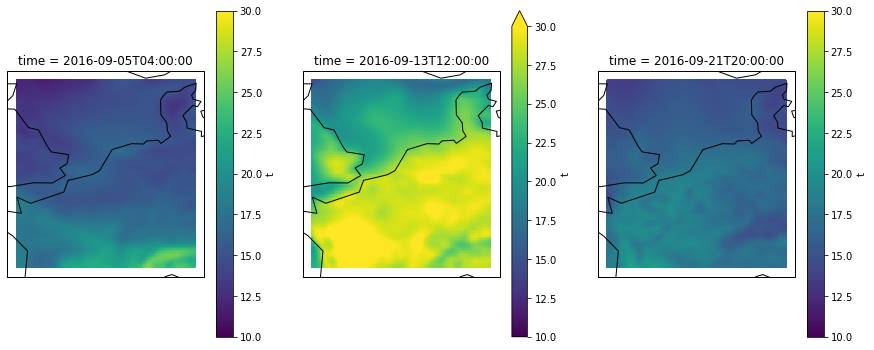

In [7]:
#%matplotlib notebook

da = ds.t

fig, ax = plt.subplots(ncols=3, figsize = (15,6), subplot_kw={'projection': ccrs.PlateCarree()})

#dt = da.sel(time='2016-09-01T00:00:00.000000000') - 273.15
#ax = plt.axes(projection=ccrs.PlateCarree())
#dt.plot(ax=ax1, vmin=10, vmax=30)

def plot(idx, axis):
    axis.coastlines() 
    dt = da.sel(time=ds.time.values[idx]) - 273.15
    dt.plot(ax=axis, vmin=10, vmax=30)
    
for axidx, tidx in enumerate([100, 300, 500]):
    plot(tidx, ax[axidx])

fig.show()

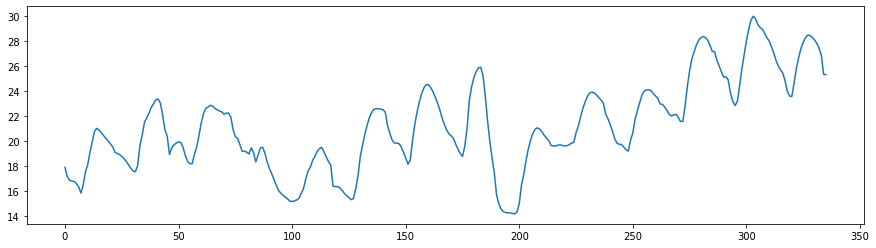

In [33]:
fig, ax = plt.subplots(figsize=(15,4))
dsub = da.sel(longitude=5.06, latitude=50.01, time=slice('2016-09-01', '2016-09-14'))
#ds.temperature.sel(lat=53.55, lon=3.5, method='nearest')
x.plot(dsub.values - 273.15)
#ax.set_xticklabels(dsub.time.values, rotation='vertical');

In [5]:
bounds = np.array([content['how']['lon_min'],
                       content['how']['lat_min'],
                       content['how']['lon_max'],
                       content['how']['lat_max']]).reshape(2,2)
radars   = content['what']['source'].astype(str)
quantity = content['what']['quantity'].astype(str)[0]
proj     = content['where']['projdef'].astype(str)[0]

meta = {'bounds': bounds.tolist(),
        'radars': radars.tolist(),
        'quantity': str(quantity),
        'proj4str': str(proj)}
with open('test_meta.yml', 'w+') as f:
            yaml.dump(meta, f)

In [36]:
arr = fcontent['VID_data/data']
meta = fcontent['how']
meta2 = fcontent['what']
meta3 = fcontent['where']
arr2 = arr.copy()
arr2[arr2 > 2000] = 2000
#arr2[arr2 == 0] = np.nan

<ipython-input-36-2efa8a2aa7f1>:6: RuntimeWarning: invalid value encountered in greater
  arr2[arr2 > 2000] = 2000


In [45]:
#bounds=((data.bounds.bottom, data.bounds.left), \
#                 (data.bounds.top, data.bounds.right))
print(np.array([meta['lon_min'], meta['lat_min']]).flatten())
print(meta)
print(meta2)
print(meta3)
bounds = np.array([meta['lon_min'], meta['lat_min'], \
                       meta['lon_max'], meta['lat_max']]).reshape(2,2)

radars = meta2['source'].astype(str)
quantity = meta2['quantity'].astype(str)[0]
projection = meta3['projdef'].astype(str)[0]

info = {'bounds':bounds, 'radars':radars, 'quantity':quantity, 'projection':projection}
info

[45.9054985 -1.9358   ]
{'lat_max': array([10.17834]), 'lat_min': array([-1.9358]), 'lon_max': array([57.9533386]), 'lon_min': array([45.9054985]), 'resolution': array([0.01, 0.01]), 'xsize': array([1211], dtype=int32), 'ysize': array([1205], dtype=int32)}
{'datetime': array([b'2016-09-29 21:30:00'], dtype='|S20'), 'object': array([b'IMAGE'], dtype='|S6'), 'quantity': array([b'VID'], dtype='|S4'), 'source': array([b'NL/DBL', b'NL/DHL', b'NL/HRW', b'BE/JAB', b'BE/ZAV'], dtype='|S7')}
{'projdef': array([b'+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0'],
      dtype='|S55')}


{'bounds': array([[45.9054985, -1.9358   ],
        [57.9533386, 10.17834  ]]),
 'radars': array(['NL/DBL', 'NL/DHL', 'NL/HRW', 'BE/JAB', 'BE/ZAV'], dtype='<U7'),
 'quantity': 'VID',
 'projection': '+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0'}

<ipython-input-48-8fb5681d36a6>:5: RuntimeWarning: invalid value encountered in greater
  arr[arr>2000] = 2000


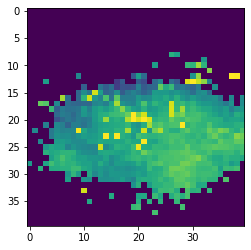

In [48]:
#arr = np.load('/home/fiona/20151020T2145.npy')
arr = np.load('/home/fiona/20161004T0045.npy')
#arr = np.load('/home/fiona/20161003T1700.npy')

arr[arr>2000] = 2000
#arr = arr[260:740, 260:740]
#arr = arr[300:700, 300:700]
arr = cv2.resize(arr, (100, 100))
arr = arr[30:70, 30:70]

plt.imshow(np.log(arr+0.1))#np.log(arr))

In [30]:
[f'{m:02}' for m in range(8, 12)]

['08', '09', '10', '11']

-1.876543247526728


<ipython-input-60-e0125fd3441e>:1: RuntimeWarning: divide by zero encountered in log
  log_arr = np.log(arr)


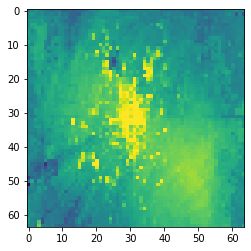

In [60]:
log_arr = np.log(arr)
log_arr2 = log_arr[np.where(np.isfinite(log_arr))]
print(np.min(log_arr2))
log_arr = np.nan_to_num(log_arr, nan=np.mean(log_arr2), posinf=np.log(2000), neginf=np.mean(log_arr2))
#sb.distplot(log_arr)
plt.imshow(log_arr)

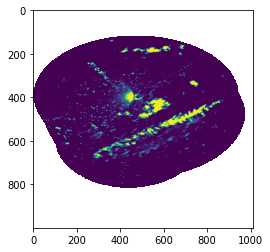

In [17]:
plt.imshow(arr2[100:1100, 200:])

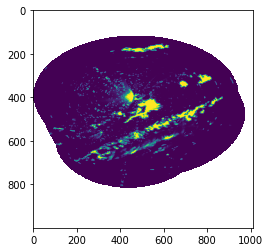

In [21]:
plt.imshow(arr2[100:1100, 200:])
#sb.distplot(arr2.flatten())

In [28]:
np.nanmean(arr2[arr2<50])

<ipython-input-28-0692cf17f992>:1: RuntimeWarning: invalid value encountered in less
  np.nanmean(arr2[arr2<50])


1.1490334480301834

In [53]:
# Resize to desired image shape
img = arr[100:1100, 200:]
img = cv2.resize(img, (128, 128))
img = np.nan_to_num(img)

#img = img.astype(np.float32)
#img = img/np.nanmax(img)

<ipython-input-54-6895f932e540>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(img), cmap='rainbow')


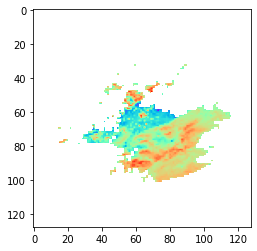

In [54]:
plt.imshow(np.log(img), cmap='rainbow')

In [2]:
ds = xr.open_dataset('/home/fiona/birdMigration/preprocessing/era5_land.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 81, time: 2928)
Coordinates:
  * longitude  (longitude) float32 -1.0 -0.9 -0.8 -0.7 -0.6 ... 6.7 6.8 6.9 7.0
  * latitude   (latitude) float32 54.0 53.9 53.8 53.7 ... 46.3 46.2 46.1 46.0
  * time       (time) datetime64[ns] 2016-08-01 ... 2016-11-30T23:00:00
Data variables:
    sshf       (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-07 09:29:13 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

<ipython-input-22-134de62be6f4>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


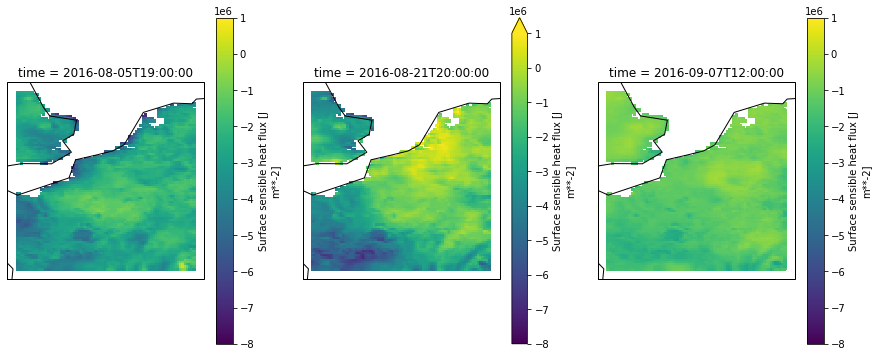

In [22]:
da = ds.sshf

fig, ax = plt.subplots(ncols=3, figsize = (15,6), subplot_kw={'projection': ccrs.PlateCarree()})

#dt = da.sel(time='2016-09-01T00:00:00.000000000') - 273.15
#ax = plt.axes(projection=ccrs.PlateCarree())
#dt.plot(ax=ax1, vmin=10, vmax=30)

def plot(idx, axis):
    axis.coastlines() 
    dt = da.sel(time=ds.time.values[idx])
    dt.plot(ax=axis, vmin=-8*1e6, vmax=1e6)
    
for axidx, tidx in enumerate([115, 500, 900]):
    plot(tidx, ax[axidx])

fig.show()

In [23]:
ds = xr.open_dataset('/home/fiona/birdMigration/preprocessing/era5_pressure_levels.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 81, level: 3, longitude: 81, time: 2928)
Coordinates:
  * longitude  (longitude) float32 -1.0 -0.9 -0.8 -0.7 -0.6 ... 6.7 6.8 6.9 7.0
  * latitude   (latitude) float32 54.0 53.9 53.8 53.7 ... 46.3 46.2 46.1 46.0
  * level      (level) int32 600 800 1000
  * time       (time) datetime64[ns] 2016-08-01 ... 2016-11-30T23:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-07 09:11:43 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

<ipython-input-31-995ec87ff090>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


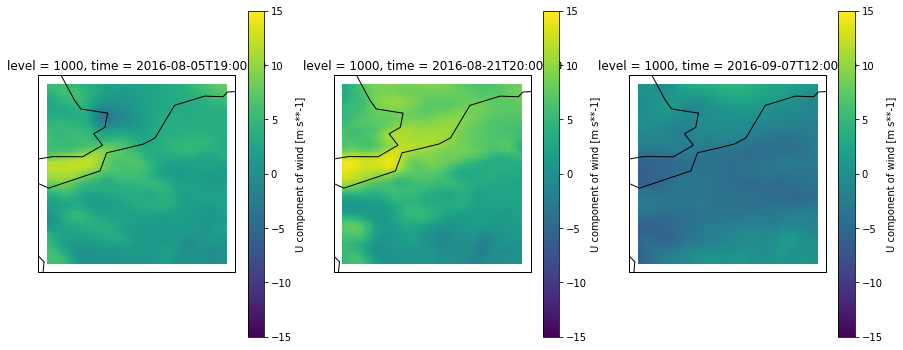

In [31]:
da = ds.u

fig, ax = plt.subplots(ncols=3, figsize = (15,6), subplot_kw={'projection': ccrs.PlateCarree()})

def plot(idx, axis):
    axis.coastlines() 
    dt = da.sel(time=ds.time.values[idx], level=1000)
    dt.plot(ax=axis, vmin=-15, vmax=15)
    
for axidx, tidx in enumerate([115, 500, 900]):
    plot(tidx, ax[axidx])

fig.show()

<ipython-input-29-da2ff1cb26a8>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


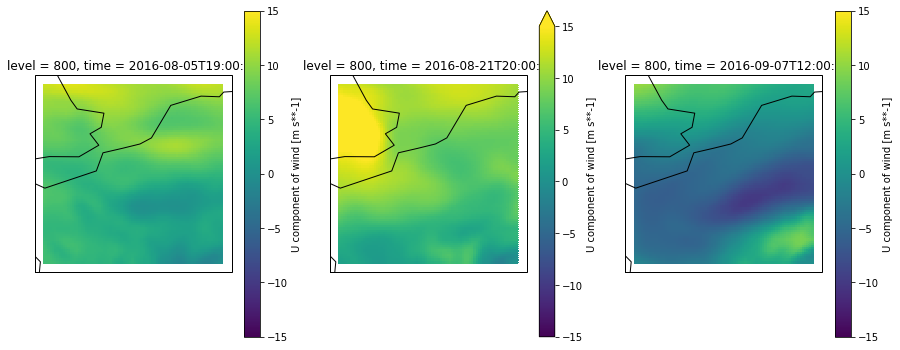

In [29]:
da = ds.u

fig, ax = plt.subplots(ncols=3, figsize = (15,6), subplot_kw={'projection': ccrs.PlateCarree()})

def plot(idx, axis):
    axis.coastlines() 
    dt = da.sel(time=ds.time.values[idx], level=800)
    dt.plot(ax=axis, vmin=-15, vmax=15)
    
for axidx, tidx in enumerate([115, 500, 900]):
    plot(tidx, ax[axidx])

fig.show()

<ipython-input-30-2f9f5c1909fa>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


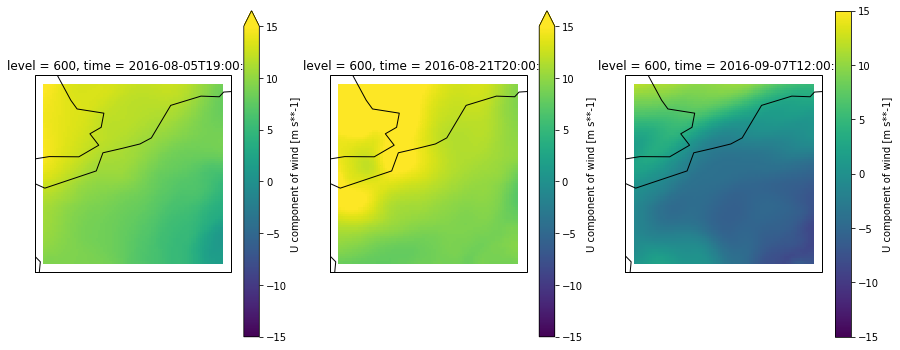

In [30]:
da = ds.u

fig, ax = plt.subplots(ncols=3, figsize = (15,6), subplot_kw={'projection': ccrs.PlateCarree()})

def plot(idx, axis):
    axis.coastlines() 
    dt = da.sel(time=ds.time.values[idx], level=600)
    dt.plot(ax=axis, vmin=-15, vmax=15)
    
for axidx, tidx in enumerate([115, 500, 900]):
    plot(tidx, ax[axidx])

fig.show()

In [7]:
test = xr.open_mfdataset(['/home/fiona/birdMigration/preprocessing/era5_pressure_levels.nc', '/home/fiona/birdMigration/preprocessing/era5_land.nc'], combine='by_coords')

In [8]:
test

<xarray.Dataset>
Dimensions:    (latitude: 81, level: 3, longitude: 81, time: 2928)
Coordinates:
  * longitude  (longitude) float32 -1.0 -0.9 -0.8 -0.7 -0.6 ... 6.7 6.8 6.9 7.0
  * latitude   (latitude) float32 54.0 53.9 53.8 53.7 ... 46.3 46.2 46.1 46.0
  * time       (time) datetime64[ns] 2016-08-01 ... 2016-11-30T23:00:00
  * level      (level) int32 600 800 1000
Data variables:
    sshf       (time, latitude, longitude) float32 dask.array<chunksize=(2928, 81, 81), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(2928, 81, 81), meta=np.ndarray>
    t          (time, level, latitude, longitude) float32 dask.array<chunksize=(2928, 3, 81, 81), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(2928, 3, 81, 81), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(2928, 3, 81, 81), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-07 09:11:43 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...